Splitting Dataset into Train, Validation, and Test Sets

In [ ]:
import splitfolders
import os
path = "New-Dataset"
print(os.listdir(path))

['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']


In [ ]:
# Split the dataset
splitfolders.ratio("New-Dataset", output="splitted_new_dataset", ratio=(0.8, 0.1, 0.1), group_prefix=None, move=True, seed=42)

Copying files: 0 files [00:00, ? files/s]

Copying files: 11726 files [00:35, 329.26 files/s]


Converting Images to RGB Format

In [ ]:
from PIL import Image
import os

def convert_images_to_rgb(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(root, filename)
                with Image.open(img_path) as img:
                    if img.mode != 'RGB':
                        rgb_img = img.convert('RGB')
                        rgb_img.save(img_path)
                        print(f"Converted {filename} to RGB mode")

convert_images_to_rgb('splitted_new_dataset')

Image Resizing and Padding for Standardization

In [ ]:
import os
from PIL import Image, ImageOps

def process_image(image_path, output_path):
    image = Image.open(image_path)
    w, h = image.size

    # Calculate the aspect ratio
    aspect_ratio = w / h

    # Determine the new size keeping the aspect ratio
    if aspect_ratio > 1:  # Width is greater than height
        new_w = 256
        new_h = int(new_w / aspect_ratio)
    else:  # Height is greater than or equal to width
        new_h = 256
        new_w = int(new_h * aspect_ratio)

    # Resize the image
    resized_image = image.resize((new_w, new_h), Image.Resampling.LANCZOS)

    # Calculate padding
    pad_h = (256 - new_h) // 2
    pad_w = (256 - new_w) // 2

    # Pad the resized image to make it 256x256
    padded_image = ImageOps.expand(resized_image, (pad_w, pad_h, 256 - new_w - pad_w, 256 - new_h - pad_h), fill=0)

    # Save the resized image
    padded_image.save(output_path)

def process_folder(input_folder, output_folder):
    # Iterate through the directory
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                input_path = os.path.join(root, file)
                # Create the corresponding output path
                relative_path = os.path.relpath(input_path, input_folder)
                output_path = os.path.join(output_folder, relative_path)

                # Create the output directory if it doesn't exist
                os.makedirs(os.path.dirname(output_path), exist_ok=True)

                # Process the image
                process_image(input_path, output_path)

# Set your input and output directories
input_folder = 'splitted_new_dataset'
output_folder = 'final_splitted_new_dataset'

# Process the entire folder
process_folder(input_folder, output_folder)


Image Resizing and Visualization

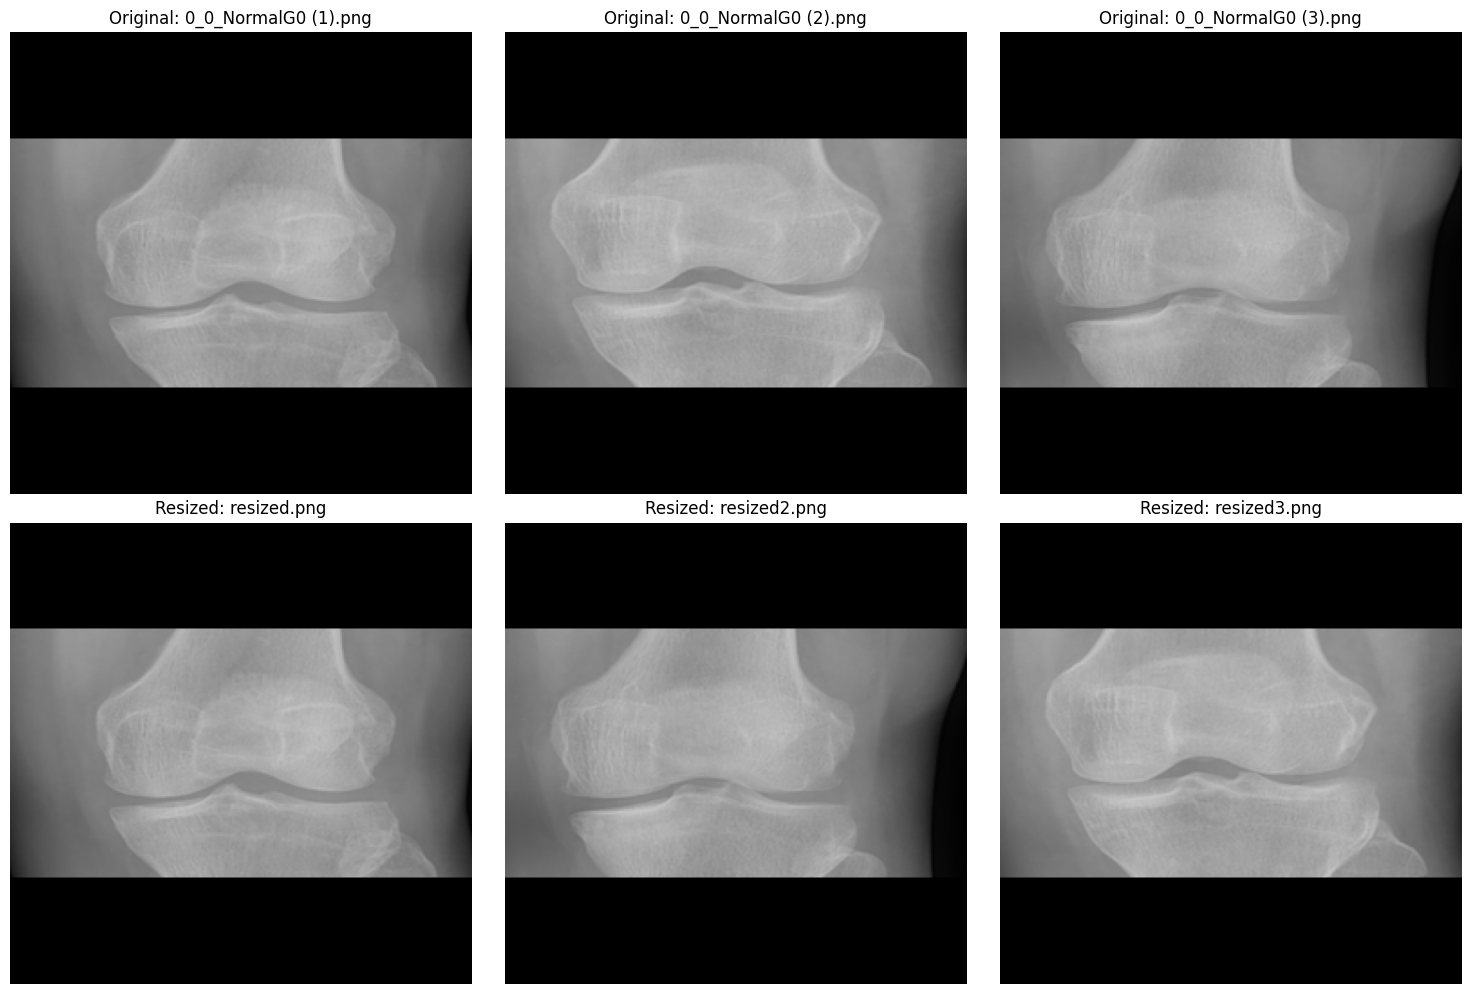

In [ ]:
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def process_image(image_path):
    image = Image.open(image_path)
    w, h = image.size

    # Calculate the aspect ratio
    aspect_ratio = w / h

    # Determine the new size keeping the aspect ratio
    if aspect_ratio > 1:  # Width is greater than height
        new_w = 256
        new_h = int(new_w / aspect_ratio)
    else:  # Height is greater than or equal to width
        new_h = 256
        new_w = int(new_h * aspect_ratio)

    # Resize the image
    resized_image = image.resize((new_w, new_h), Image.Resampling.LANCZOS)

    # Calculate padding
    pad_h = (256 - new_h) // 2
    pad_w = (256 - new_w) // 2

    # Pad the resized image to make it 256x256
    padded_image = ImageOps.expand(resized_image, (pad_w, pad_h, 256 - new_w - pad_w, 256 - new_h - pad_h), fill=0)

    return padded_image

def display_images(input_folder):
    original_images = []
    resized_images = []

    for file in os.listdir(input_folder):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            input_path = os.path.join(input_folder, file)

            # Check the starting character of the filename
            if file.startswith('0'):
                original_images.append((file, Image.open(input_path)))
            elif file.startswith('r'):
                resized_image = process_image(input_path)
                resized_images.append((file, resized_image))

    # Ensure we have exactly three images for each category
    assert len(original_images) == 3 and len(resized_images) == 3, "There should be exactly three images starting with '0' and three images starting with 'r'"

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Display original images in the first row
    for i, (filename, img) in enumerate(original_images):
        axes[0, i].imshow(img)
        axes[0, i].set_title(f"Original: {filename}")
        axes[0, i].axis('off')

    # Display resized images in the second row
    for i, (filename, img) in enumerate(resized_images):
        axes[1, i].imshow(img)
        axes[1, i].set_title(f"Resized: {filename}")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Set your input directory
input_folder = 'images'

# Display the images
display_images(input_folder)


Class Distribution Analysis in Validation Data

Class: 0Normal, Count: 339
Class: 1Doubtful, Count: 284
Class: 2Mild, Count: 304
Class: 3Moderate, Count: 174
Class: 4Severe, Count: 70


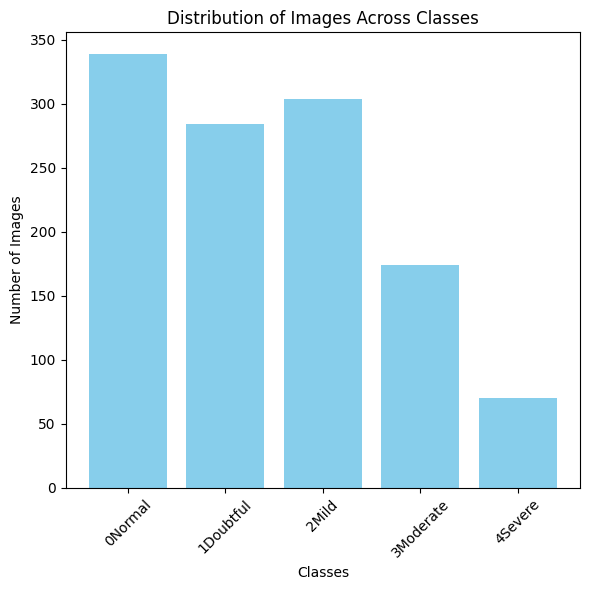

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to your dataset directory
dataset_dir = 'final_splitted_new_dataset'

# Get the list of classes
classes = os.listdir(os.path.join(dataset_dir, 'val'))

# Initialize a dictionary to store the count of images for each class
class_counts = {cls: 0 for cls in classes}

# Count the number of images for each class in the training dataset
for cls in classes:
    class_path = os.path.join(dataset_dir, 'val', cls)
    num_images = len(os.listdir(class_path))
    class_counts[cls] = num_images

for cls, count in class_counts.items():
    print(f"Class: {cls}, Count: {count}")
# Plotting the bar graph
plt.figure(figsize=(6, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Image Sizes and Modes Analysis

In [ ]:
from PIL import Image
from collections import Counter
import os

def print_image_sizes_and_modes(directory):
    # Create counters to keep track of sizes and modes
    counter = Counter()
    mode_counter = Counter()

    # Walk through the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # Check for image files with .jpg or .png extensions
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Open the image file
                img = Image.open(os.path.join(root, filename))
                # Get the size and mode of the image
                size = img.size
                mode = img.mode
                # Print the size and mode of the current image
                print(f"The size of {filename} is {size} and mode is {mode}")
                # Update the counters for sizes and modes
                counter[size] += 1
                mode_counter[mode] += 1

    # Print the counts of each size
    print("Sizes and their counts:")
    total = 0
    for size, count in counter.items():
        print(f"Size: {size}, Count: {count}")
        total += count
    print(f"Total count of all sizes: {total}")

    # Print the counts of each mode
    print("Modes and their counts:")
    for mode, count in mode_counter.items():
        print(f"Mode: {mode}, Count: {count}")

# Call the function with the specified directory
print_image_sizes_and_modes('splitted_new_dataset')


The size of 0_0_NormalG0 (100).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (106).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (110).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (122).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (125).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (141).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (153).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (170).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (177).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (191).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (197).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (209).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (214).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (216).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 (217).png is (300, 162) and mode is RGB
The size of 0_0_NormalG0 

Image Augmentation for Class Balance

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# Define parameters
target_count = 1500  # Target count for each class
img_size = (256, 256)  # Size of the images for augmentation

# Function to perform augmentation
def augment_images(images, output_dir, target_count):
    print(f"Augmenting images for class {output_dir.split('/')[-1]}")
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Perform augmentation until the target count is reached
    count = len(images)
    while count < target_count:
        for image in images:
            img = cv2.imread(image)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img.reshape((1,) + img.shape)
            for batch in datagen.flow(img, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpg'):
                count += 1
                print(f"Image created: {count}/{target_count}", end='\r')
                if count >= target_count:
                    break
            if count >= target_count:
                break

# Iterate through class directories
data_dir = "splitted_new_dataset/train"
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        images = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith(".png")]
        count = len(images)
        print(f"Class: {class_name}, Count before augmentation: {count}")

        # Balance class count
        if count > target_count:
            np.random.shuffle(images)
            images = images[:target_count]
        elif count < target_count:
            augment_images(images, class_dir, target_count)

        # After augmentation, count images again
        images = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith(".png")]
        count = len(images)
        print(f"Class: {class_name}, Count after augmentation: {count}")

# Now the class count is balanced in the train directory
print("All classes processed.")


Class: 0Normal, Count before augmentation: 2714
Class: 0Normal, Count after augmentation: 2714
Class: 1Doubtful, Count before augmentation: 2275
Class: 1Doubtful, Count after augmentation: 2275
Class: 2Mild, Count before augmentation: 2433
Class: 2Mild, Count after augmentation: 2433
Class: 3Moderate, Count before augmentation: 1392
Augmenting images for class train\3Moderate
Class: 3Moderate, Count after augmentation: 1392
Class: 4Severe, Count before augmentation: 565
Augmenting images for class train\4Severe
Class: 4Severe, Count after augmentation: 565
All classes processed.


Displaying Original and Augmented Images

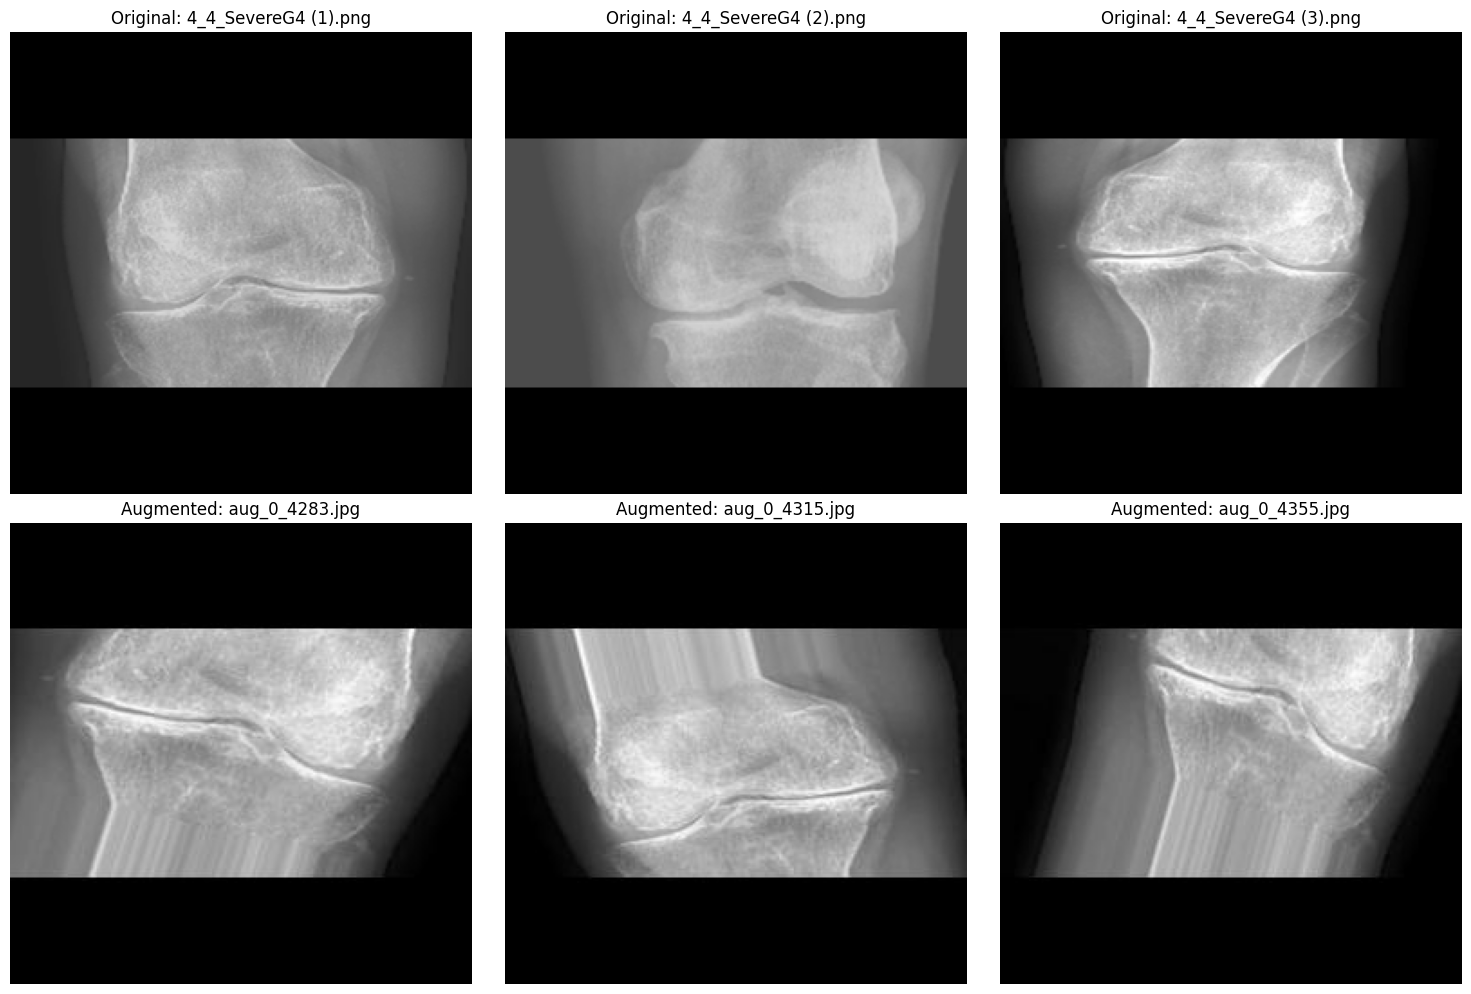

In [ ]:
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def process_image(image_path):
    image = Image.open(image_path)
    w, h = image.size

    # Calculate the aspect ratio
    aspect_ratio = w / h

    # Determine the new size keeping the aspect ratio
    if aspect_ratio > 1:  # Width is greater than height
        new_w = 256
        new_h = int(new_w / aspect_ratio)
    else:  # Height is greater than or equal to width
        new_h = 256
        new_w = int(new_h * aspect_ratio)

    # Resize the image
    resized_image = image.resize((new_w, new_h), Image.Resampling.LANCZOS)

    # Calculate padding
    pad_h = (256 - new_h) // 2
    pad_w = (256 - new_w) // 2

    # Pad the resized image to make it 256x256
    padded_image = ImageOps.expand(resized_image, (pad_w, pad_h, 256 - new_w - pad_w, 256 - new_h - pad_h), fill=0)

    return padded_image

def display_images(input_folder):
    original_images = []
    augmented_images = []

    for file in os.listdir(input_folder):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            input_path = os.path.join(input_folder, file)

            # Check the starting character of the filename
            if file.startswith('4'):
                original_images.append((file, Image.open(input_path)))
            elif file.startswith('a'):
                augmented_image = process_image(input_path)
                augmented_images.append((file, augmented_image))

    # Ensure we have exactly three images for each category
    assert len(original_images) == 3 and len(augmented_images) == 3, "There should be exactly three original images starting with '4' and three augmented images starting with 'a'"

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Display original images in the first row
    for i, (filename, img) in enumerate(original_images):
        axes[0, i].imshow(img)
        axes[0, i].set_title(f"Original: {filename}")
        axes[0, i].axis('off')

    # Display augmented images in the second row
    for i, (filename, img) in enumerate(augmented_images):
        axes[1, i].imshow(img)
        axes[1, i].set_title(f"Augmented: {filename}")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Set your input directory
input_folder = 'images'

# Display the images
display_images(input_folder)
